The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city.<br> Data was recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. <br>Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. <br> Missing values are tagged with -200 value.

Attribute Information:

0 Date (DD/MM/YYYY)<br> 
1 Time (HH.MM.SS)<br>
2 True hourly averaged concentration CO in mg/m^3 (reference analyzer)<br>
3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)<br>
4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)<br>
5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)<br>
6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)<br>
7 True hourly averaged NOx concentration in ppb (reference analyzer)<br>
8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)<br>
9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)<br>
10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)<br>
11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)<br>
12 Temperature in Â°C<br>
13 Relative Humidity (%)<br>
14 AH Absolute Humidity

# IMPORT FUNCTIONS

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, r2_score,accuracy_score, mean_squared_error,classification_report
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor,Lasso,Ridge
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler,scale,LabelEncoder
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA,NMF
from scipy import stats

# CODE

In [ ]:
df = pd.read_csv('AirQualityUCI.csv')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
df = df.drop(columns = ['Unnamed: 15','Unnamed: 16'])
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
df.isna().sum().sum()

1710

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [ ]:
list(df.columns)

['Date',
 'Time',
 'CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

In [ ]:
df['Date']=pd.to_datetime(df.Date, dayfirst=False)
df['Month']= df['Date'].dt.month  
df['Hour']=df['Time'].apply(lambda x: int(x.split(':')[0]))
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
Month                     int64
Hour                      int64
dtype: object

In [ ]:
df.replace(to_replace= -200, value= np.NaN, inplace= True)

In [ ]:
df.isna().sum().sum()

16701

In [ ]:
df= df.drop(columns=['Date','Time'])
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Hour
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3,18
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3,19
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0.7502,3,20
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3,21
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3,22


In [ ]:
imputer = SimpleImputer(missing_values=np.NaN, strategy = 'mean')
df = imputer.fit_transform(df)
df = pd.DataFrame(df, columns = ['CO(GT)','PT08.S1(CO)','NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
 'PT08.S5(O3)', 'T', 'RH', 'AH','Month','Hour'])

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Hour
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,3.0,18.0
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,3.0,19.0
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0.7502,3.0,20.0
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,3.0,21.0
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,3.0,22.0


In [ ]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Hour
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.152750,1099.713158,218.811816,10.083105,939.030252,246.882871,835.370370,113.075437,1456.142142,1022.782894,18.316316,49.232633,1.025530,6.310356,11.498557
std,1.316068,212.797231,63.870229,7.302650,261.558742,193.423447,251.742814,43.912005,339.370276,390.613598,8.657847,16.974585,0.395835,3.438160,6.923182
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,1.000000,0.000000
25%,1.200000,941.000000,218.811816,4.600000,742.000000,112.000000,666.000000,86.000000,1242.000000,742.000000,12.000000,36.600000,0.746100,3.000000,5.000000
50%,2.152750,1074.000000,218.811816,8.600000,923.000000,229.000000,818.000000,113.075437,1456.142142,982.000000,18.300000,49.232633,1.015400,6.000000,11.000000
75%,2.600000,1221.000000,218.811816,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,9.000000,18.000000
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,12.000000,23.000000


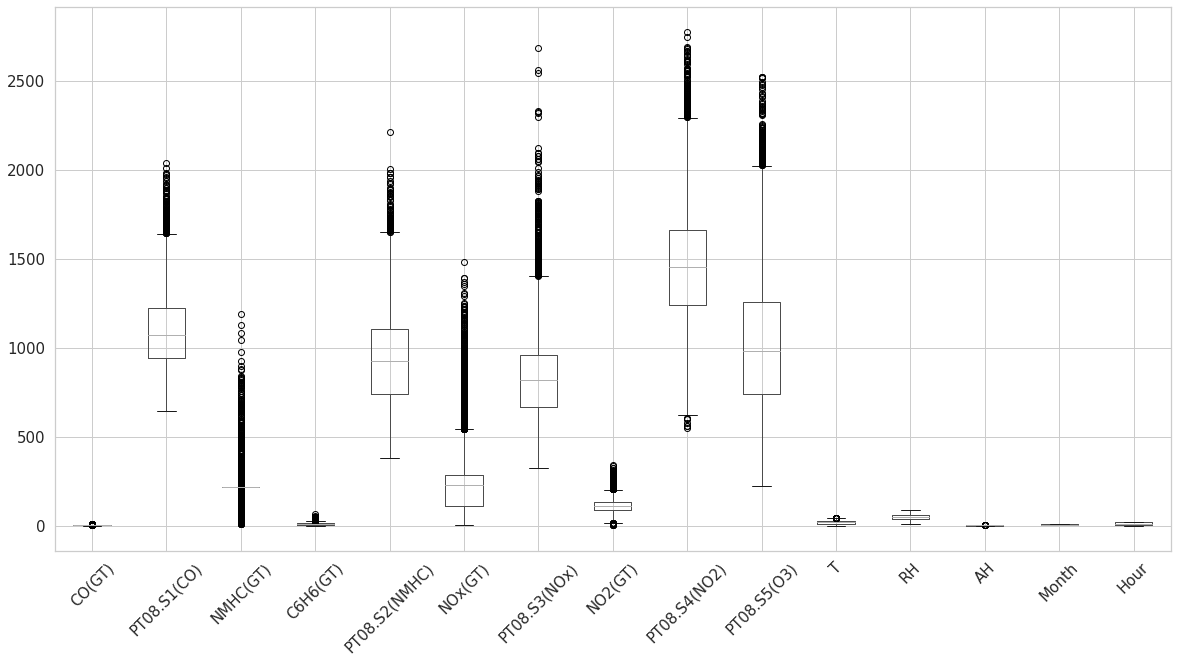

In [ ]:
plt.figure(figsize=(20,10))
boxplot = df.boxplot(rot=45,fontsize=15) 

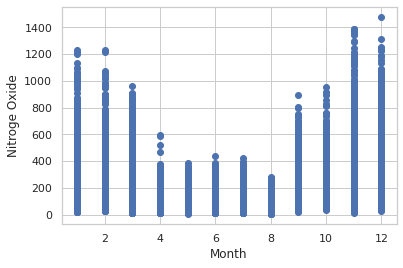

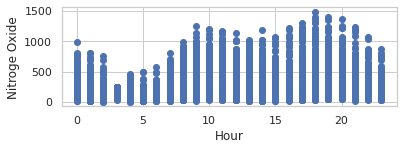

In [ ]:
plt.subplot(1,1,1)
plt.xlabel('Month')
plt.ylabel('Nitroge Oxide')
plt.scatter(df['Month'],df['NOx(GT)'])
plt.show()

plt.subplot(2,1,2)
plt.xlabel('Hour')
plt.ylabel('Nitroge Oxide')
plt.scatter(df['Hour'],df['NOx(GT)'])
plt.show()

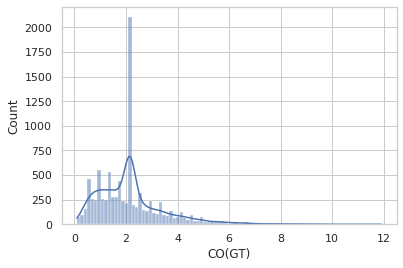

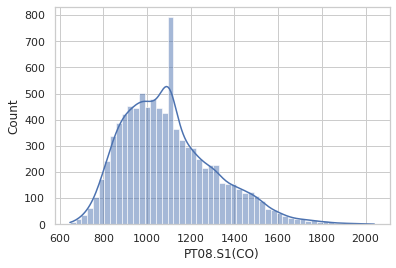

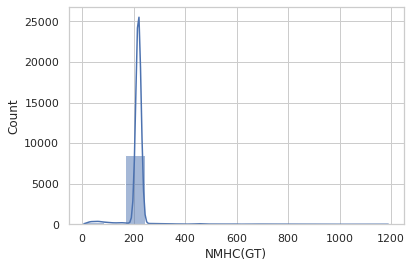

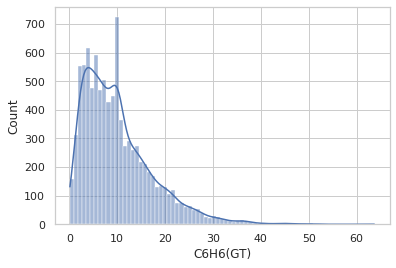

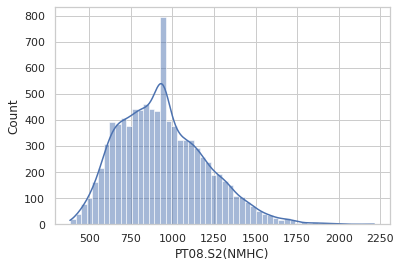

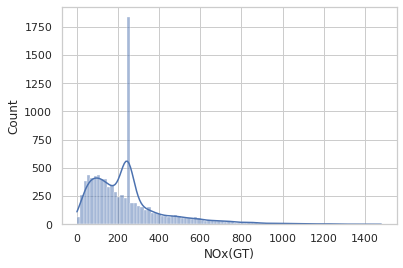

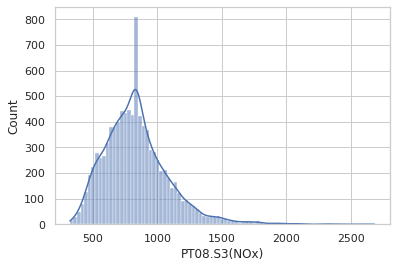

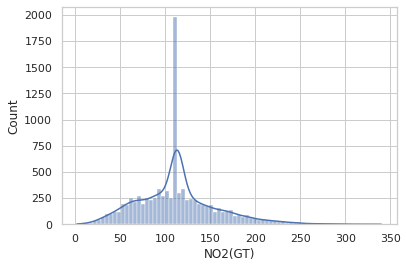

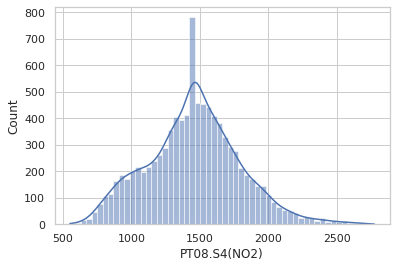

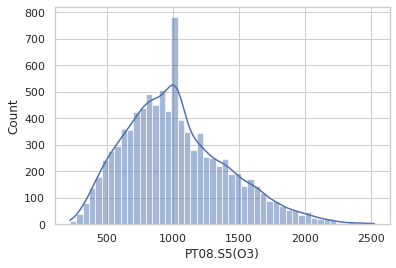

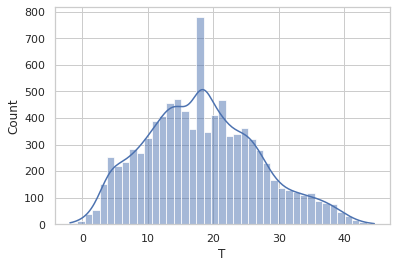

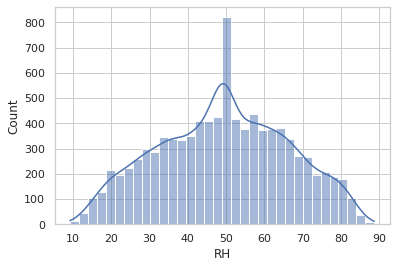

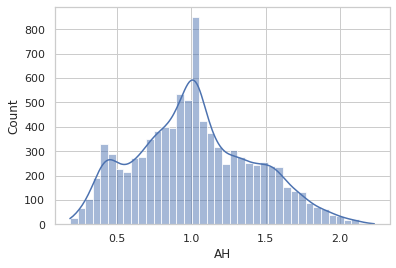

In [ ]:
for i in df.columns[:13]:
    sns.histplot(df[i],kde=True)
    plt.show()

In [ ]:
df2=df.copy()
#df2=df2.drop(columns=['Month','Hour'])
Scaler=MinMaxScaler()
Xsd=Scaler.fit_transform(df2)    #Applying Normalization
df3 = pd.DataFrame(Xsd, columns = ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
 'PT08.S5(O3)', 'T', 'RH','AH','Month','Hour'])

In [ ]:
df3.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Month,Hour
0,0.211864,0.511845,0.120981,0.185535,0.362097,0.111036,0.310885,0.328402,0.513040,0.454822,0.333333,0.499371,0.280066,0.181818,0.782609
1,0.161017,0.463029,0.088832,0.146226,0.312398,0.068382,0.360864,0.266272,0.453237,0.326238,0.326882,0.484277,0.264282,0.181818,0.826087
2,0.177966,0.541996,0.068528,0.139937,0.303659,0.087339,0.346463,0.331361,0.450989,0.370547,0.296774,0.563522,0.276352,0.181818,0.869565
3,0.177966,0.523331,0.061760,0.143082,0.308575,0.115098,0.326133,0.355030,0.464478,0.426586,0.277419,0.638994,0.294190,0.181818,0.913043
4,0.127119,0.448672,0.037225,0.100629,0.247406,0.087339,0.373994,0.337278,0.422212,0.386186,0.281720,0.633962,0.295216,0.181818,0.956522


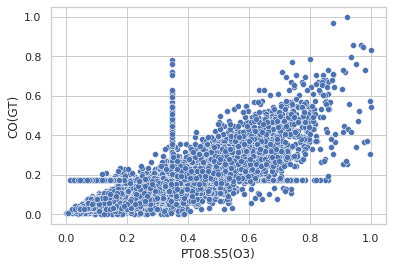

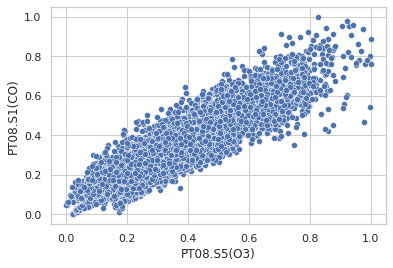

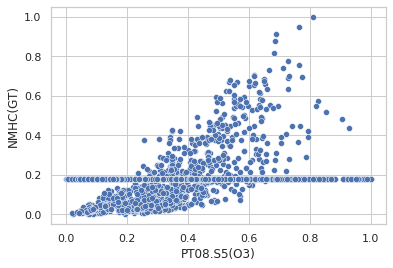

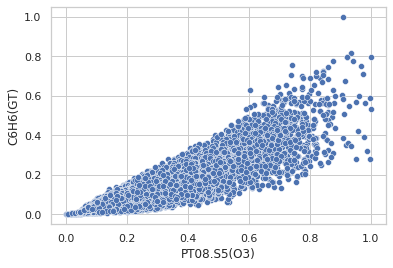

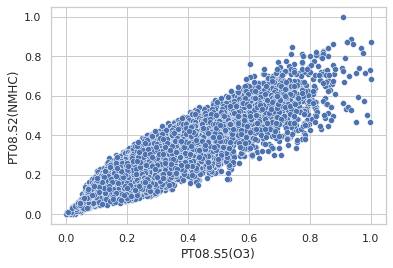

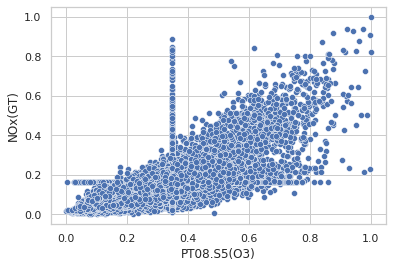

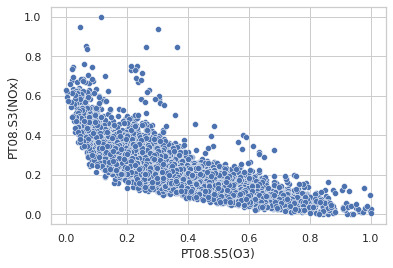

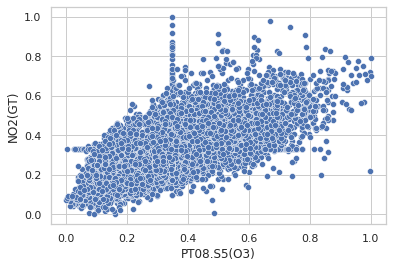

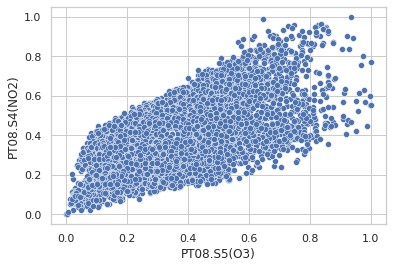

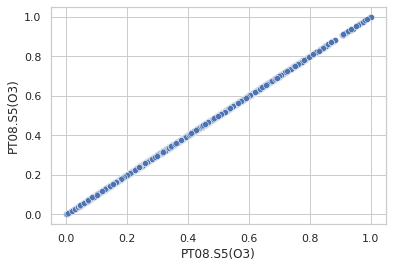

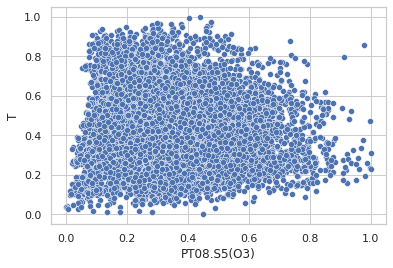

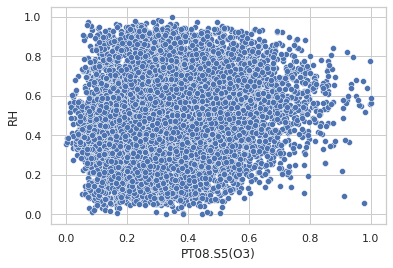

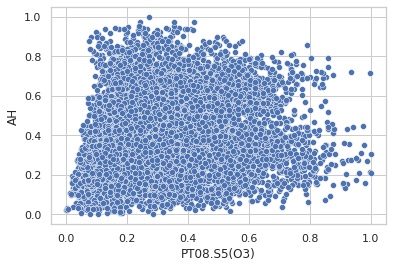

In [ ]:
for i in df3.columns[:13]:
    sns.scatterplot(x=df3['PT08.S5(O3)'],y=df3[i])
    plt.show()

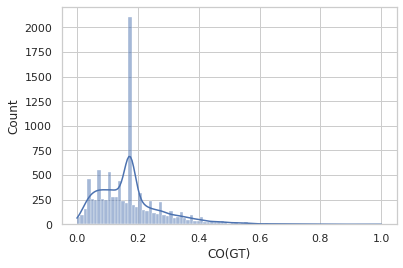

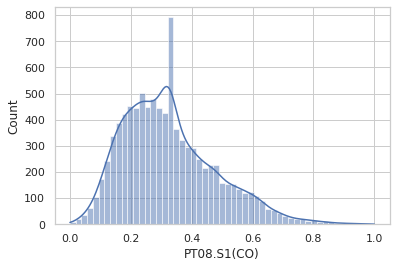

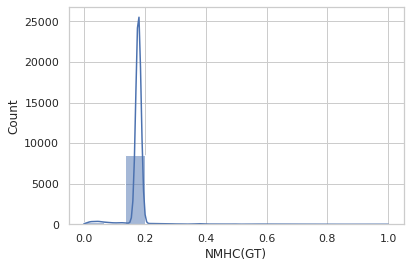

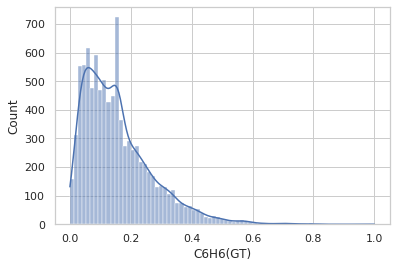

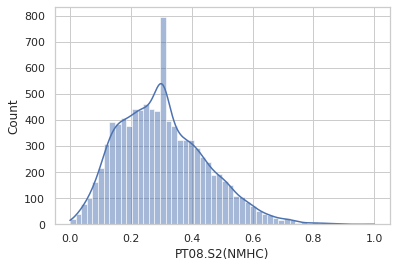

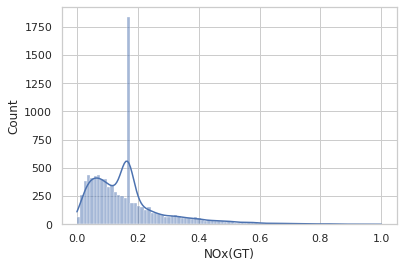

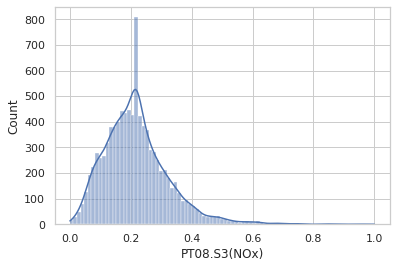

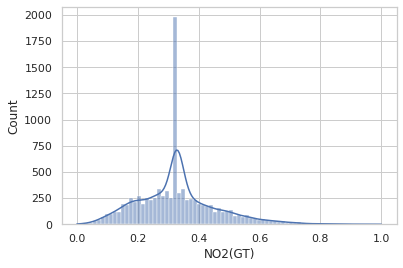

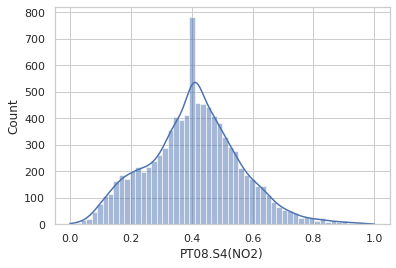

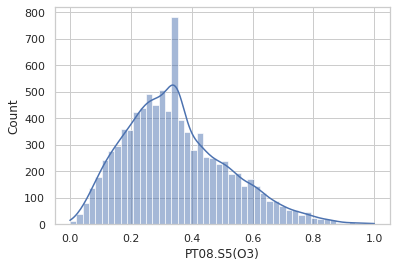

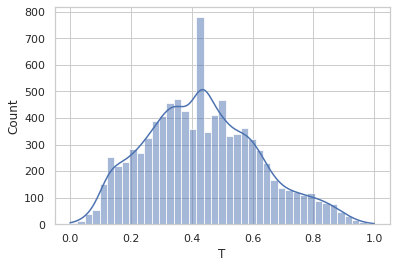

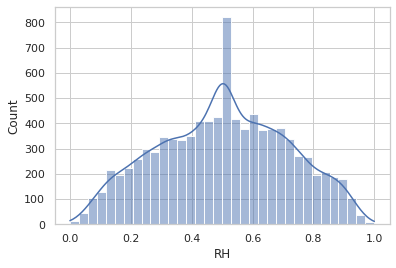

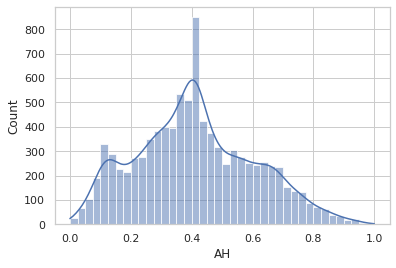

In [ ]:
for i in df3.columns[:13]:
    sns.histplot(df3[i],kde=True)
    plt.show()

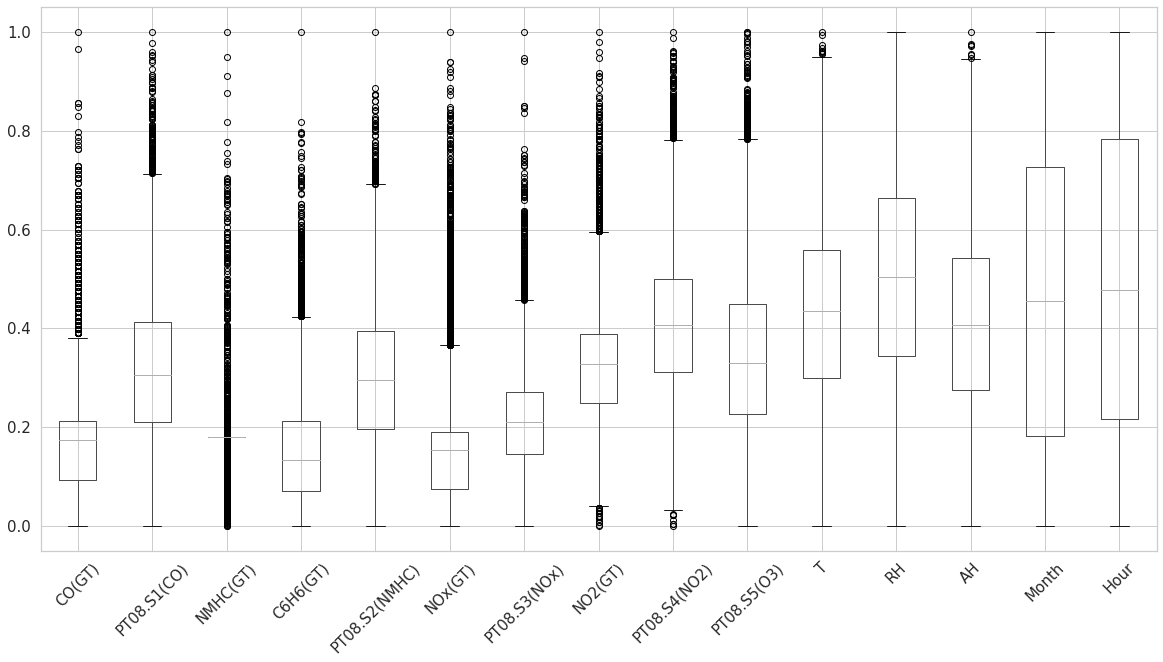

In [ ]:
plt.figure(figsize=(20,10))
boxplot = df3.boxplot(rot=45,fontsize=15) 

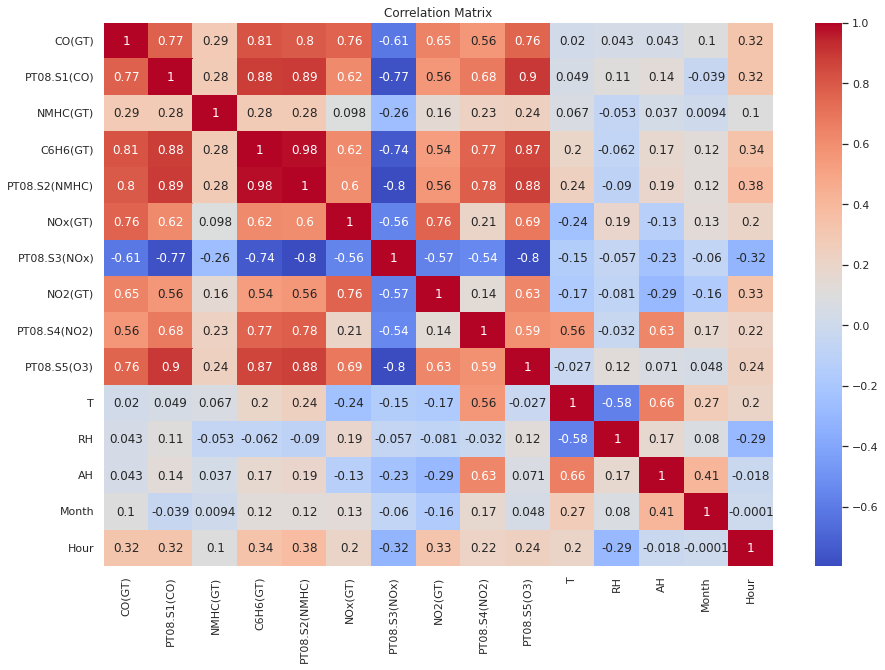

In [ ]:
#Plotting correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df3.corr(),annot=True,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df4=df.copy()
X=df4.drop(columns=['PT08.S5(O3)','T','RH','AH','Hour','Month','PT08.S3(NOx)','NMHC(GT)'])  
y=df4[['PT08.S5(O3)']]
X_n=df3.drop(columns=['PT08.S5(O3)','T','RH','AH','Hour','Month','PT08.S3(NOx)','NMHC(GT)'])  
y_n=df3[['PT08.S5(O3)']] #target variable PT08.S5(03)

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3,random_state=42)
X_train_n, X_test_n, y_train_n, y_test_n=train_test_split(X_n, y_n, test_size=0.3,random_state=42)

In [ ]:
#Normalized Data
pca_n = PCA(n_components=3)
X_train_n = pca_n.fit_transform(X_train_n)
X_test_n = pca_n.transform(X_test_n)

In [ ]:
explained_variance = pca_n.explained_variance_ratio_
explained_variance

array([0.71286281, 0.18263439, 0.03536817])

# LINEAR REGRESSION

In [ ]:
model_lr=LinearRegression()
model_lr=model_lr.fit(X_train, y_train)

In [ ]:
model_lr_n=LinearRegression()
model_lr_n=model_lr_n.fit(X_train_n, y_train_n)

In [ ]:
y_pred_lr=model_lr.predict(X_test)
y_pred_lr_n=model_lr_n.predict(X_test_n)

In [ ]:
y_pred_tr = model_lr_n.predict(X_train_n)

In [ ]:
round(r2_score(y_train_n,y_pred_tr))

1

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


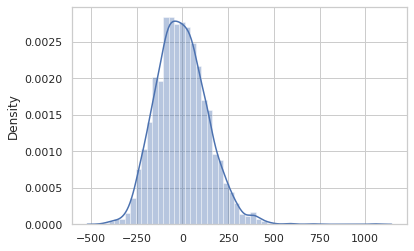

In [ ]:
sns.distplot(y_test-y_pred_lr)

In [ ]:
lrstat = [round(mean_squared_error(y_test,y_pred_lr),4), round(np.sqrt(mean_squared_error(y_test,y_pred_lr)),4),round(r2_score(y_test,y_pred_lr)*100,4)]
print('MSE value for LinearRegression model is {}'.format(lrstat[0]))
print('RMSE value for LinearRegression model is {}'.format(lrstat[1]))
print('R^2 value for LinearRegression model is {}'.format(lrstat[2]))

MSE value for LinearRegression model is 19895.3696
RMSE value for LinearRegression model is 141.0509
R^2 value for LinearRegression model is 87.2235


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


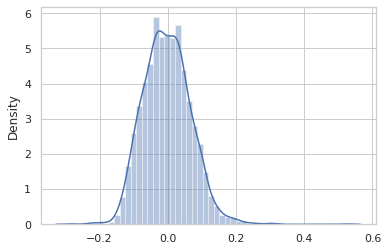

In [ ]:
sns.distplot(y_test_n-y_pred_lr_n)

In [ ]:
lrstat_n = [round(mean_squared_error(y_test_n,y_pred_lr_n),4), round(np.sqrt(mean_squared_error(y_test_n,y_pred_lr_n)),4),round(r2_score(y_test_n,y_pred_lr_n)*100,4)]
print('MSE value for Normalized LinearRegression model is {}'.format(lrstat_n[0]))
print('RMSE value for Normalized LinearRegression model is {}'.format(lrstat_n[1]))
print('R^2 value for Normalized LinearRegression model is {}'.format(lrstat_n[2]))

MSE value for Normalized LinearRegression model is 0.0048
RMSE value for Normalized LinearRegression model is 0.0689
R^2 value for Normalized LinearRegression model is 83.828


# LASSO

In [ ]:
model_las=Lasso(alpha=3)
model_las=model_las.fit(X_train,y_train)
y_pred_las=model_las.predict(X_test)

In [ ]:
model_las_n=Lasso(alpha=3)
model_las_n=model_las_n.fit(X_train_n,y_train_n)
y_pred_n=model_las_n.predict(X_test_n)

In [ ]:
lasstat = [round(mean_squared_error(y_test,y_pred_las),4), round(np.sqrt(mean_squared_error(y_test,y_pred_las)),4),round(r2_score(y_test,y_pred_las)*100,4)]
print('MSE value for LassoRegression model is {}'.format(lasstat[0]))
print('RMSE value for LassoRegression model is {}'.format(lasstat[1]))
print('R^2 value for LassoRegression model is {}'.format(lasstat[2]))

MSE value for LassoRegression model is 19921.0274
RMSE value for LassoRegression model is 141.1419
R^2 value for LassoRegression model is 87.207


In [ ]:
lasstat_n = [round(mean_squared_error(y_test_n,y_pred_n),4), round(np.sqrt(mean_squared_error(y_test_n,y_pred_n)),4),round(r2_score(y_test_n,y_pred_n)*100,4)]
print('MSE value for Normalized LassoRegression model is {}'.format(lasstat_n[0]))
print('RMSE value for Normalized LassoLinearRegression model is {}'.format(lasstat_n[1]))
print('R^2 value for Normalized LassoLinearRegression model is {}'.format(lasstat_n[2]))

MSE value for Normalized LassoRegression model is 0.0294
RMSE value for Normalized LassoLinearRegression model is 0.1714
R^2 value for Normalized LassoLinearRegression model is -0.0332


# RIDGE

In [ ]:
model_rid=Ridge()
model_rid=model_rid.fit(X_train,y_train)

In [ ]:
model_rid_n=Ridge()
model_rid_n=model_rid_n.fit(X_train_n,y_train_n)

In [ ]:
y_pred_rid=model_rid.predict(X_test)
y_pred_rid_n=model_rid_n.predict(X_test_n)

In [ ]:
mse_rid=np.sqrt(mean_squared_error(y_test_n,y_pred_rid))

In [ ]:
ridstat = [round(mean_squared_error(y_test,y_pred_rid),4), round(np.sqrt(mean_squared_error(y_test,y_pred_rid)),4),round(r2_score(y_test,y_pred_rid)*100,4)]
print('MSE value for Normalized RidgeRegression model is {}'.format(ridstat[0]))
print('RMSE value for Normalized RidgeLinearRegression model is {}'.format(ridstat[1]))
print('R^2 value for Normalized RidgeLinearRegression model is {}'.format(ridstat[2]))

MSE value for Normalized RidgeRegression model is 19895.3812
RMSE value for Normalized RidgeLinearRegression model is 141.051
R^2 value for Normalized RidgeLinearRegression model is 87.2235


In [ ]:
ridstat_n = [round(mean_squared_error(y_test_n,y_pred_rid_n),4), round(np.sqrt(mean_squared_error(y_test_n,y_pred_rid_n)),4),round(r2_score(y_test_n,y_pred_rid_n)*100,4)]
print('MSE value for Normalized RidgeRegression model is {}'.format(ridstat_n[0]))
print('RMSE value for Normalized RidgeLinearRegression model is {}'.format(ridstat_n[1]))
print('R^2 value for Normalized RidgeLinearRegression model is {}'.format(ridstat_n[2]))

MSE value for Normalized RidgeRegression model is 0.0048
RMSE value for Normalized RidgeLinearRegression model is 0.0689
R^2 value for Normalized RidgeLinearRegression model is 83.8305


# LOGISTIC

In [ ]:
df_log=df.copy()
X_log=df_log.drop(columns=['PT08.S5(O3)','T','RH','AH','Hour','Month','PT08.S3(NOx)','NMHC(GT)'])  
y_log=df_log[['PT08.S5(O3)']]
X_log = np.column_stack([np.ones(X_n.shape[0]), X_n])

X_train_log, X_test_log, y_train_log, y_test_log=train_test_split(X_log, y_n, test_size=0.3,random_state=42)
lab_enc = LabelEncoder()
training_y = lab_enc.fit_transform(y_train_log)
y_test_enc = lab_enc.fit_transform(y_test_log)

training_y = training_y.reshape(-1, 1)
print(training_y)
model_log = LogisticRegression()
model_log=model_log.fit(X_train_log,training_y)

y_pred_log=model_log.predict(X_test_log) 
y_pred_log


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[1248]
 [ 632]
 [1126]
 ...
 [1123]
 [1086]
 [1294]]


array([701, 701, 701, ..., 701, 701, 701])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


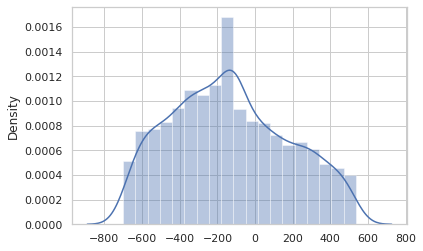

In [ ]:
sns.distplot(y_test_enc-y_pred_log)

In [ ]:
logstat = [round(mean_squared_error(y_test_enc,y_pred_log),4), round(np.sqrt(mean_squared_error(y_test_enc,y_pred_log)),4),round(r2_score(y_test_enc,y_pred_log)*100,4)]
print('MSE value for LogisticRegression model is {}'.format(logstat[0]))
print('RMSE value for LogisticRegression model is {}'.format(logstat[1]))
print('R^2 value for LogisticRegression model is {}'.format(logstat[2]))

MSE value for LogisticRegression model is 114274.9316
RMSE value for LogisticRegression model is 338.0458
R^2 value for LogisticRegression model is -18.6171


# SVD

In [ ]:
X_svd = np.column_stack([np.ones(X_n.shape[0]), X_n])
X_train_svd, X_test_svd, y_train_svd, y_test_svd=train_test_split(X_svd, y, test_size=0.3)

U,S,Vt = np.linalg.svd(X_train_svd, full_matrices=False)

x_hat = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ y_train_svd

y_pred_svd_train = X_train_svd @ x_hat
y_pred_svd = X_test_svd @ x_hat

mse_svd=np.sqrt(mean_squared_error(y_test_svd,y_pred_svd))
print(mse_svd)
print(r2_score(y_test_svd,y_pred_svd))

140.02681969610924
0.8724182585735798


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


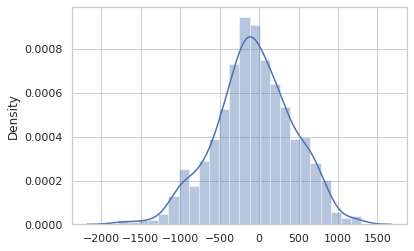

In [ ]:
sns.distplot(y_test_svd-y_pred_svd)

In [ ]:
svdstat = [round(mean_squared_error(y_test_svd,y_pred_svd),4), round(np.sqrt(mean_squared_error(y_test_svd,y_pred_svd)),4),round(r2_score(y_test_svd,y_pred_svd)*100,4)]
print('MSE value for SVD model is {}'.format(svdstat[0]))
print('RMSE value for SVD model is {}'.format(svdstat[1]))
print('R^2 value for SVD model is {}'.format(svdstat[2]))

MSE value for SVD model is 19607.5102
RMSE value for SVD model is 140.0268
R^2 value for SVD model is 87.2418


# LEAST SQUARES

In [ ]:
import statsmodels.api as sm

results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            PT08.S5(O3)   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          4.873e+04
Date:                Tue, 20 Dec 2022   Prob (F-statistic):                        0.00
Time:                        02:54:09   Log-Likelihood:                         -42100.
No. Observations:                6549   AIC:                                  8.421e+04
Df Residuals:                    6542   BIC:                                  8.426e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
CO(GT)          -19.1610      3.065     -6.251      0.000     -25.170     -13.153
PT08.S1(CO)       0.7546      0.019     40.408      0.000       0.718       0.791
C6H6(GT)         23.9525      0.813     29.467      0.000      22.359      25.546
PT08.S2(NMHC)     0.1809      0.034      5.326      0.000       0.114       0.248
NOx(GT)           0.2730      0.019     14.258      0.000       0.235       0.311
NO2(GT)           0.3066      0.074      4.117      0.000       0.161       0.453
PT08.S4(NO2)     -0.1884      0.011    -17.195      0.000      -0.210      -0.167
==============================================================================
Omnibus:                      417.569   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              744.530
Skew:                           0.480   Prob(JB):                    2.12e-162
Kurtosis:                       4.344   Cond. No.                     3.52e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train_n, X_test_n, y_train_n, y_test_n=train_test_split(X_n, y_n, test_size=0.3,random_state=42)
results1 = sm.OLS(y_train_n, X_train_n).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            PT08.S5(O3)   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                          3.527e+04
Date:                Tue, 20 Dec 2022   Prob (F-statistic):                        0.00
Time:                        02:54:14   Log-Likelihood:                          8911.9
No. Observations:                6549   AIC:                                 -1.781e+04
Df Residuals:                    6542   BIC:                                 -1.776e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
CO(GT)           -0.1133      0.015     -7.571      0.000      -0.143      -0.084
PT08.S1(CO)       0.5692      0.012     49.180      0.000       0.546       0.592
C6H6(GT)         -0.2325      0.031     -7.543      0.000      -0.293      -0.172
PT08.S2(NMHC)     0.7091      0.030     23.469      0.000       0.650       0.768
NOx(GT)           0.2168      0.012     18.445      0.000       0.194       0.240
NO2(GT)           0.0423      0.010      4.335      0.000       0.023       0.061
PT08.S4(NO2)     -0.1115      0.009    -12.679      0.000      -0.129      -0.094
==============================================================================
Omnibus:                      472.013   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              862.147
Skew:                           0.522   Prob(JB):                    6.13e-188
Kurtosis:                       4.438   Cond. No.                         44.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.tools.eval_measures import rmse

ypred = results.predict(X_train)

# calc rmse
rmse = rmse(y_train, ypred)

In [ ]:
print("RMSE along the axis :",rmse) # for Original Data

RMSE along the axis : [606.66413296 395.75400972 542.67371677 ... 722.01929078 571.12431375
 664.75226789]


In [ ]:
from statsmodels.tools.eval_measures import rmse

# fit your model which you have already done

# now generate predictions
ypred = results1.predict(X_train_n)

# calc rmse
rmse = rmse(y_train_n, ypred)

In [ ]:
print("RMSE along the axis :",rmse) # for normalized data

RMSE along the axis : [0.26861643 0.17108547 0.24613596 ... 0.30799439 0.25407641 0.30791442]


In [ ]:
OLS_R2=[0.981,0.974]
OLS_RMSE = [606.66,0.23]

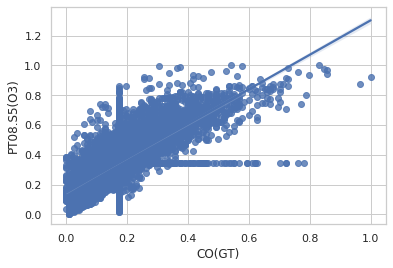

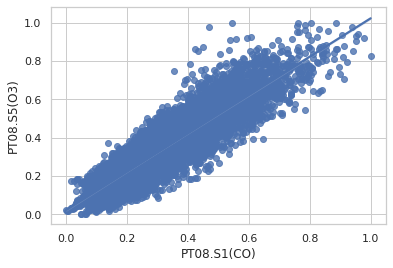

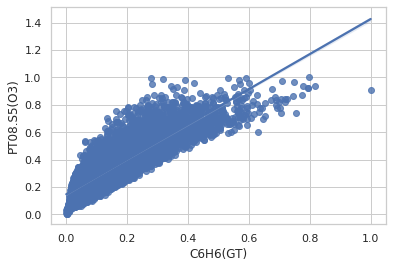

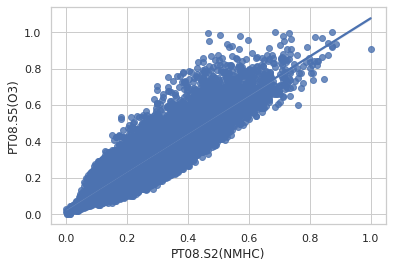

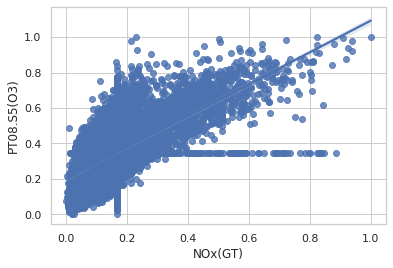

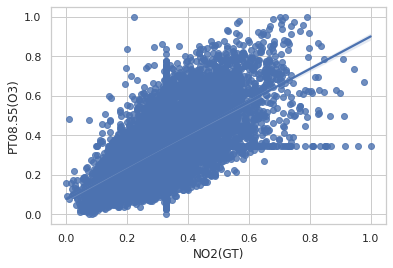

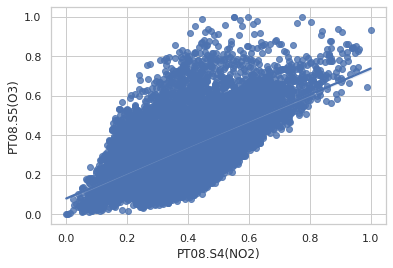

In [ ]:
for i in X.columns[:12]:
  sns.regplot(data=df3,x=df3[i], y=df3['PT08.S5(O3)'])
  plt.show()


# CONCLUSION

In [ ]:
conclusion = pd.DataFrame(data=[lrstat,lrstat_n,lasstat,lasstat_n,ridstat,ridstat_n,logstat,svdstat],
                          index=['Linear Regression','Linear Regression using normalization','Lasso Regression',
                                 'Lasso Regression using normalization','Ridge Regression','Ridge Regression using normalization','Logistic Regression','SVD Model'],
                         columns = ['MSE','RMSE','R^2'])
conclusion

,MSE,RMSE,R^2
Linear Regression,19895.3696,141.0509,87.2235
Linear Regression using normalization,0.0048,0.0689,83.8280
Lasso Regression,19921.0274,141.1419,87.2070
Lasso Regression using normalization,0.0294,0.1714,-0.0332
Ridge Regression,19895.3812,141.0510,87.2235
Ridge Regression using normalization,0.0048,0.0689,83.8305
Logistic Regression,114274.9316,338.0458,-18.6171
SVD Model,19607.5102,140.0268,87.2418


In [ ]:
OLS_conclusion = pd.DataFrame(data=[OLS_R2,OLS_RMSE],index = ['R2 for OLS','RMSE for OLS'],
                              columns=['Original Data','Normalized data',])
OLS_conclusion

,Original Data,Normalized data
R2 for OLS,0.981,0.974
RMSE for OLS,606.660,0.230
